In [31]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.layers import Embedding,LSTM,Dropout, Dense, Activation, GlobalMaxPool1D
from keras import Input, Model

In [2]:
data=pd.read_csv("train.csv")
testdata=pd.read_csv("test.csv")

In [3]:
testdata.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
data.iloc[1]

id                                                000103f0d9cfb60f
comment_text     D'aww! He matches this background colour I'm s...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 1, dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
np.sum(data["toxic"])

15294

In [7]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum(axis=0)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
pd.crosstab(data["threat"],"count")

col_0,count
threat,
0,159093
1,478


In [24]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
x_train=data["comment_text"]
y_train=data[list_classes]
x_test=testdata["comment_text"]
x_train[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [26]:
type(x_train)
regex_pat = re.compile('@[^\\s]+', flags=re.IGNORECASE)
x_train= x_train.str.replace(regex_pat,'')

regex_pat = re.compile('(f|ht)tp(s?)://(.*)[.][a-z]+', flags=re.IGNORECASE)
x_train= x_train.str.replace(regex_pat,'')

regex_pat = re.compile('[0-9]', flags=re.IGNORECASE)
x_train= x_train.str.replace(regex_pat,'')

#regex_pat = re.compile('&', flags=re.IGNORECASE)
x_train= x_train.str.replace('&','and')
#regex_pat = re.compile('.', flags=re.IGNORECASE)
x_train= x_train.str.replace('.',' <period> ')
x_train= x_train.str.replace(',', ' <COMMA> ')
x_train= x_train.str.replace('"', ' <QUOTATION_MARK> ')
x_train= x_train.str.replace(';', ' <SEMICOLON> ')
x_train= x_train.str.replace('!', ' <EXCLAMATION_MARK> ')
x_train= x_train.str.replace('?', ' <QUESTION_MARK> ')
x_train= x_train.str.replace('(', ' <LEFT_PAREN> ')
x_train= x_train.str.replace(')', ' <RIGHT_PAREN> ')
x_train= x_train.str.replace('-', ' <HYPHENS> ')
x_train= x_train.str.replace(':', ' <COLON> ')
x_train= x_train.str.replace('\n',' ')

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted <QUESTION_MARK>  They weren't vandalisms <COMMA>  just closure on some GAs after I voted at New York Dolls FAC <period>  And please don't remove the template from the talk page since I'm retired now <period>  <period>  <period>  <period> "

In [29]:
x_train[2]

"Hey man <COMMA>  I'm really not trying to edit war <period>  It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page <period>  He seems to care more about the formatting than the actual info <period> "

In [75]:
#results=set()
#x_train["comment_text"].str.lower().str.split().apply(results.update)
#a=results

In [30]:
max_features=200000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
x_train_tk=tokenizer.texts_to_sequences(x_train)
x_test_tk=tokenizer.texts_to_sequences(x_test)

In [33]:
totalNumWords = [len(cmnt) for cmnt in x_train_tk]

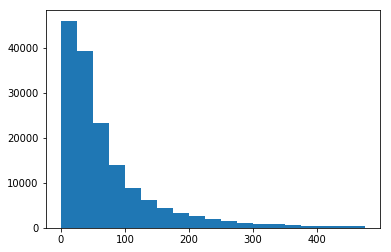

In [36]:
plt.hist(totalNumWords,bins=np.arange(0,500,25))
plt.show()

In [32]:
maxlen=200
x_t=pad_sequences(x_train_tk, maxlen=maxlen)
x_te=pad_sequences(x_test_tk, maxlen=maxlen)

In [38]:
inp = Input(shape=(maxlen, ))
X=Embedding(max_features,128)(inp)
X=LSTM(60,return_sequences=True)(X)
X=x = GlobalMaxPool1D()(X)
X=Dense(6)(X)
X=Activation("softmax")(X)

In [39]:
model=Model(inputs=inp,outputs=X)
model.compile(loss="categorical_crossentropy",optimizer='adam')

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 366       
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
Total params: 25,645,726
Trainable params: 25,645,726
Non-trainable params: 0
________________________________________________________________

In [41]:
history=model.fit(x_t,y_train,batch_size=2048,epochs=5,validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/1
143613/143613 [==============================] - 860s 6ms/step - loss: 0.3146 - val_loss: 0.3049


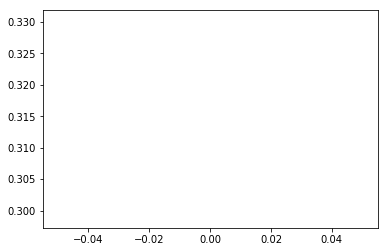

In [43]:
plt.plot(history.history['loss'])
plt.show()

In [136]:
out=model.predict(x_te)

In [167]:
out[0]

array([ 0.36172837,  0.04816502,  0.31939349,  0.01233036,  0.2199484 ,
        0.03843439], dtype=float32)

In [164]:
result=pd.DataFrame(testdata["id"],columns=["id"])
tmp=pd.DataFrame(out,columns=list_classes)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
id    153164 non-null object
dtypes: object(1)
memory usage: 1.2+ MB


In [168]:
result=result.join(tmp)

In [170]:
result.to_csv("try.csv",index=False)